In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier   # we will use the kNN classifier template model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import Binarizer
import time
from sklearn.dummy import DummyClassifier
import numpy as np

<bound method NDFrame.tail of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

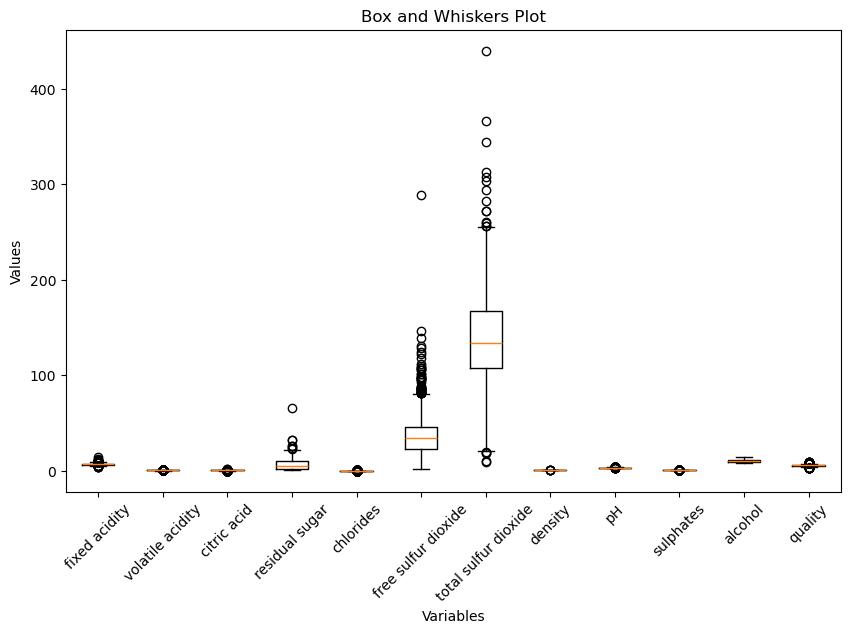

done with setting aside data for testing


In [4]:
###upload CSV via pandas (deliverable)
wine_df=pd.read_csv("winequality-white.csv")
print(wine_df.tail) 


###Numerical summary (deliverable)
wine_describe_df=wine_df.describe()
print(wine_describe_df)
columns_list=wine_df.columns


###Graphical representation (deliverable)
plt.figure(figsize=(10, 6))
plt.boxplot([wine_df[col] for col in columns_list], labels=columns_list)
plt.title('Box and Whiskers Plot')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

### Setting up classification problem by reproducibly splitting the data into training and test set
test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 7          # specifying the seed allows for repeatability
X=wine_df.iloc[:,0:11]
y=wine_df.loc[:,"quality"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed) #(deliverable)
print('done with setting aside data for testing')

In [8]:
###PROBLEM 2

clf = svm.SVC(kernel='linear', C=1)   # large C means little to no regularization, default = 1.0
start_time = time.time()

clf.fit(X_train, y_train)
end_time = time.time()
elapsed_time_SVC = end_time-start_time

scores_svm = np.mean(cross_val_score(clf, X_train, y_train, cv=4, scoring='f1_weighted')) ##deliverable
print("F1 Scores for each fold:", scores_svm)
print("Took this many seconds",elapsed_time_SVC)

F1 Scores for each fold: 0.43835089822707496
Took this many seconds 67.38397479057312


In [10]:
###PROBLEM 2 Decision tree
selected_model = DecisionTreeClassifier()
selected_model.fit(X_train, y_train)
scores_tree = np.mean(cross_val_score(selected_model, X_train, y_train, cv=4, scoring='f1_macro'))
print(4-Fold Cross-Validation scores (Decision Tree, accuracy F1):", scores_tree) #deliverable


Stratified 4-Fold Cross-Validation scores (Decision Tree, accuracy F1): 0.33079022958830573


In [18]:
###PROBLEM 3

selected_model = DecisionTreeClassifier()
hyperparameters = {'max_depth':[5, 6, 7], 'criterion':['gini', 'entropy'] }
clf = GridSearchCV(selected_model, hyperparameters, cv=4, scoring='f1_macro')
clf.fit(X_train, y_train)
tuned_model_DT = clf.best_estimator_

print("Best hyperparameters found on development set for Decision Tree:")
print(clf.best_params_)
best_score = np.mean(cross_val_score(tuned_model_DT, X_train, y_train, cv=4, scoring='f1_macro'))
print("F1 scores for best model:",best_score)

hyperparameters = {'max_depth':[6], 'criterion':['gini'] }
clf_bad = GridSearchCV(selected_model, hyperparameters, cv=4, scoring='f1_macro')
clf_bad.fit(X_train, y_train)
print(clf_bad.best_params_)
bad_score = np.mean(cross_val_score(clf_bad, X_train, y_train, cv=4, scoring='f1_macro'))
print("F1 score for worst model",bad_score)

hyperparameters = {'max_depth':[5], 'criterion':['gini'] }
clf_bad2 = GridSearchCV(selected_model, hyperparameters, cv=4, scoring='f1_macro')
clf_bad2.fit(X_train, y_train)
print(clf_bad2.best_params_)
bad_score2 = np.mean(cross_val_score(clf_bad2, X_train, y_train, cv=4, scoring='f1_macro'))
print("F1 score for worst model",bad_score2)

Best hyperparameters found on development set for Decision Tree:
{'criterion': 'entropy', 'max_depth': 7}
F1 scores for best model: 0.25805720201023646
{'criterion': 'gini', 'max_depth': 6}


C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


F1 score for worst model 0.2353351403173586
{'criterion': 'gini', 'max_depth': 5}
F1 score for worst model 0.22554824072956853


C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


In [28]:
##########################Question 4 Experimenting with different transformations and PCA
##MinMaxScaler: Scales and translates each feature individually such 
##that it is in the given range on the training set, e.g., between zero and one.
### Reduce to 1 dimension
start_time_SVCM2 = time.time()
clf_minmax_pca1 = make_pipeline(MinMaxScaler(), PCA(n_components=1), svm.SVC(kernel='linear', C=1))
clf_minmax_pca1.fit(X_train, y_train)
scores_svm_minmax_pca1 =np.mean(cross_val_score(clf_minmax_pca1, X_train, y_train, cv=4, scoring='f1_weighted'))
print("F1 Scores for each fold:", scores_svm_minmax_pca1)
end_time_SVCM2 = time.time()
elapsed_time_SVCM2 = end_time_SVCM2 - start_time_SVCM2
print("took this many seconds",elapsed_time_SVCM2)

### Reduce to 2 dimension
start_time_SVCM3 = time.time()
clf_minmax_pca2 = make_pipeline(MinMaxScaler(), PCA(n_components=2), svm.SVC(kernel='linear', C=1))
clf_minmax_pca2.fit(X_train, y_train)
scores_svm_minmax_pca2 = np.mean(cross_val_score(clf_minmax_pca2, X_train, y_train, cv=4, scoring='f1_weighted'))
print("F1 Scores for each fold:", scores_svm_minmax_pca2)
end_time_SVCM3 = time.time()
elapsed_time_SVCM3 = end_time_SVCM3 - start_time_SVCM3
print("took this many seconds",elapsed_time_SVCM3)


### Reduce to 3 dimension
start_time_SVCM4 = time.time()
clf_minmax_pca3 = make_pipeline(MinMaxScaler(), PCA(n_components=3), svm.SVC(kernel='linear', C=1))
clf_minmax_pca3.fit(X_train, y_train)
scores_svm_minmax_pca3 = np.mean(cross_val_score(clf_minmax_pca3, X_train, y_train, cv=4, scoring='f1_weighted'))
print("F1 Scores for each fold:", scores_svm_minmax_pca3)
end_time_SVCM4 = time.time()
elapsed_time_SVCM4 = end_time_SVCM4 - start_time_SVCM4
print("took this many seconds",elapsed_time_SVCM4)


#just minmax
start_time_SVCM5 = time.time()
clf_minmax= make_pipeline(MinMaxScaler(), svm.SVC(kernel='linear', C=1))
clf_minmax.fit(X_train, y_train)
scores_svm_minmax = np.mean(cross_val_score(clf_minmax, X_train, y_train, cv=4, scoring='f1_weighted'))
print("F1 Scores for each fold:(best performing: just min-max)", scores_svm_minmax)
end_time_SVCM5 = time.time()
elapsed_time_SVCM5 = end_time_SVCM5 - start_time_SVCM5
print("took this many seconds",elapsed_time_SVCM5)

##Uses binarizer
##Binarizer: Binarizes data (sets feature values to 0 or 1) according to a threshold.
start_time_SVCM6 = time.time()
clf_binary= make_pipeline(Binarizer(), svm.SVC(kernel='linear', C=1))
clf_binary.fit(X_train, y_train)
scores_svm_clf_binary = np.mean(cross_val_score(clf_binary, X_train, y_train, cv=4, scoring='f1_weighted'))
print("F1 Scores for each fold:", scores_svm_clf_binary)
end_time_SVCM6 = time.time()
elapsed_time_SVCM6 = end_time_SVCM6 - start_time_SVCM6
print("took this many seconds",elapsed_time_SVCM6)


F1 Scores for each fold: 0.3772119971137086
took this many seconds 1.317070484161377
F1 Scores for each fold: 0.37837115493632195
took this many seconds 1.227585792541504
F1 Scores for each fold: 0.41655737956378214
took this many seconds 1.281043529510498
F1 Scores for each fold:(best performing: just min-max) 0.43511771852585635
took this many seconds 1.2118165493011475
F1 Scores for each fold: 0.2735119602953889
took this many seconds 1.094449520111084


In [26]:
clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_train, y_train)

y_pred_dummy = clf_dummy.predict(X_test)
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print("accuracy for dummy classifier:",accuracy_dummy)
print(classification_report(y_test, y_pred_dummy))

y_tuned_forest=tuned_model_DT.predict(X_test)
accuracy_tuned_forest = accuracy_score(y_test, y_tuned_forest)
print("accuracy for best forest model",accuracy_tuned_forest)
print(classification_report(y_test, y_tuned_forest))

y_clf_minmax=clf_minmax.predict(X_test)
accuracy_minmax = accuracy_score(y_test, y_clf_minmax)
print("accuracy for best model in part 4, which was just using minmax",accuracy_minmax)
print(classification_report(y_test, y_clf_minmax))



accuracy for dummy classifier: 0.46530612244897956
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00       280
           6       0.47      1.00      0.64       456
           7       0.00      0.00      0.00       162
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.47       980
   macro avg       0.07      0.14      0.09       980
weighted avg       0.22      0.47      0.30       980

accuracy for best forest model 0.5520408163265306
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.50      0.10      0.17        39
           5       0.55      0.66      0.60       280
           6       0.57      0.65      0.61       456
           7       0.48      0.

C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\beatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\beatt\anaconda3\Lib\site-packag